In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#load the dataset
data=pd.read_csv('environmental factors.csv')
data.head()

,temperature,humidity,wind_speed,carbon_emissions,solar_irradiance,pollution_level
0,22.490802,52.418449,19.599966,337.165056,369.020837,84.723658
1,34.014286,49.974726,8.690240,256.681604,185.335998,49.451704
2,29.639879,40.569235,11.932794,484.024336,213.723302,19.546561
3,26.973170,66.436000,18.265613,148.540303,262.604015,73.664179
4,18.120373,58.597450,14.641787,314.535387,283.288001,41.867814


In [ ]:
data.shape

(10000, 6)

In [ ]:
data.describe()

,temperature,humidity,wind_speed,carbon_emissions,solar_irradiance,pollution_level
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,24.883191,60.271793,15.001008,274.421022,547.177425,50.314459
std,5.752603,17.357673,5.735475,130.047566,260.355761,28.834129
min,15.000233,30.009465,5.000962,50.002492,100.015063,0.000843
25%,19.926577,45.236748,10.074958,161.085762,319.845000,25.695648
50%,24.850572,60.353807,15.041362,275.013608,544.345473,50.609039
75%,29.800127,75.388753,19.893477,386.202314,775.429330,75.344597
max,34.994353,89.995490,24.998020,499.905217,999.974933,99.993970


In [ ]:
#normalize features using standardscaler

scaler=StandardScaler()
data_scaled=scaler.fit_transform(data)
#displayed scaled data
print(pd.DataFrame(data_scaled,columns=data.columns).head())


   temperature  humidity  ...  solar_irradiance  pollution_level
0    -0.415900 -0.452465  ...         -0.684316         1.193409
1     1.587377 -0.593258  ...         -1.389866        -0.029923
2     0.826917 -1.135149  ...         -1.280827        -1.067119
3     0.363328  0.355146  ...         -1.093072         0.809835
4    -1.175669 -0.096466  ...         -1.013623        -0.292954

[5 rows x 6 columns]
   temperature  humidity  ...  solar_irradiance  pollution_level
0    -0.415900 -0.452465  ...         -0.684316         1.193409
1     1.587377 -0.593258  ...         -1.389866        -0.029923
2     0.826917 -1.135149  ...         -1.280827        -1.067119
3     0.363328  0.355146  ...         -1.093072         0.809835
4    -1.175669 -0.096466  ...         -1.013623        -0.292954

[5 rows x 6 columns]


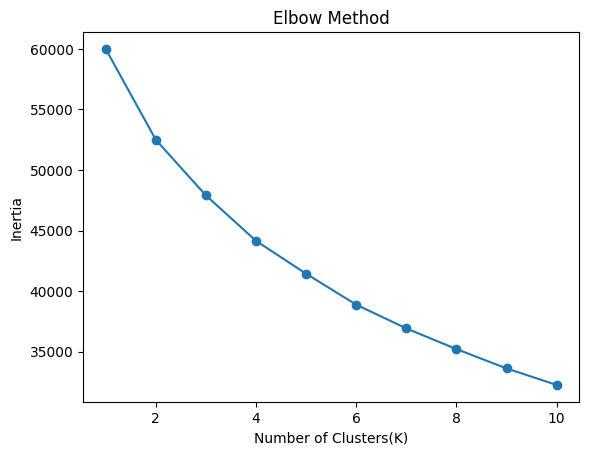

In [ ]:
#use elbow method to find the optimal number of clusters

inertia=[]
k_range=range(1,11)

for k in k_range:
  kmeans=KMeans(n_clusters=k,random_state=42)
  kmeans.fit(data_scaled)
  inertia.append(kmeans.inertia_)

#plot the inertia values to find the elbow
plt.plot(k_range,inertia,marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters(K)')
plt.ylabel('Inertia')
plt.show()

In [ ]:
# Applying K-Means clustering with k=2(example value)

k = 2

# Create a KMeans model with 3 clusters
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the model on the scaled data and assign cluster labels
data['cluster'] = kmeans.fit_predict(data_scaled)

# Display the first few rows including the assigned clusters
print(data.head())


   temperature   humidity  ...  pollution_level  cluster
0    22.490802  52.418449  ...        84.723658        1
1    34.014286  49.974726  ...        49.451704        0
2    29.639879  40.569235  ...        19.546561        0
3    26.973170  66.436000  ...        73.664179        1
4    18.120373  58.597450  ...        41.867814        0

[5 rows x 7 columns]


In [ ]:
#calculate Silhouette score

sil_score=silhouette_score(data_scaled,data['cluster'])
print("Silhouette score :",sil_score)

Silhouette score : 0.12329174489534976


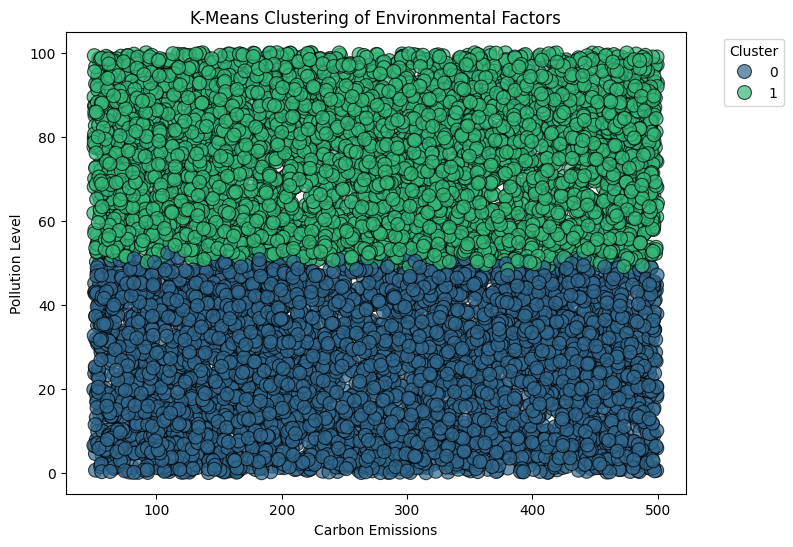

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
#assuming 'data' already contains the cluster labels (from the kmeans model)
#we'll use 2 features To plot : 'carbon emission' and 'pollution_level'

plt.figure(figsize=(8,6))
#create a scatter plot wit cluster labels

sns.scatterplot(x='carbon_emissions',y='pollution_level',hue='cluster',data=data,palette='viridis',s=100,alpha=0.7,edgecolor='k')

#title and labels
plt.title('K-Means Clustering of Environmental Factors')
plt.xlabel('Carbon Emissions')
plt.ylabel('Pollution Level')
plt.legend(title='Cluster',bbox_to_anchor=(1.05,1),loc='upper left')
plt.show()
